In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp


In [2]:
dfbill=pd.read_csv(r"D:\DS\Doctor\bill.csv")

In [3]:
dfbill.head(10)

,TimeOUT,UniqueID,OPD_fees,Medicine,Surgery_fees
0,01-10-2021 09:41,210101005.0,No,NaN,NaN
1,19-09-2021 23:24,210830001.0,100,960.0,0.0
2,30-09-2021 16:17,210910001.0,No,170.0,NaN
3,23-09-2021 11:48,210913020.0,100,620.0,NaN
4,22-09-2021 09:51,210921001.0,100,1290.0,NaN
5,22-09-2021 09:56,210921002.0,100,1190.0,NaN
6,21-09-2021 10:55,210921006.0,100,1520.0,NaN
7,21-09-2021 11:11,210921007.0,100,270.0,NaN
8,21-09-2021 11:28,210921008.0,100,490.0,NaN
9,21-09-2021 11:31,210921009.0,100,280.0,NaN


In [4]:
dfbill.isnull().sum()

TimeOUT            6
UniqueID           9
OPD_fees           6
Medicine          65
Surgery_fees    2925
dtype: int64

In [5]:
dfrec=pd.read_csv(r"D:\DS\Doctor\rec.csv")

In [6]:
dfrec.head(10)

,TimeIN,UniqueID,Type,Visit,Age,Address,Gender,Doctor,Reference,Attendant
0,19-09-2021 23:20,210830010.0,New,2,70,pithara,Male,Dr. Mamta singh,Poster/Pamplet,Lakshmi
1,30-09-2021 16:15,210901001.0,Old,2,49,Tosgav,Male,Pharmacy,Patient,Neha
2,29-09-2021 11:29,210919016.0,New,1,26,Arjunda,Female,Dr. Mamta singh,Social Media,Bandani
3,21-09-2021 09:17,210921001.0,Old,2,20,Spl,Female,Dr. Mamta singh,Painting,Bandani
4,21-09-2021 10:06,210921001.0,Old,2,50,Semliya,Female,Dr. Mamta singh,Patient,Rakhi
5,22-09-2021 09:32,210921001.0,Old,2,62,Saraipali,Male,Dr. Mamta singh,Patient,Ragini
6,27-09-2021 09:01,210921001.0,New,NaN,26,benta chowk,Male,Dr. Mamta singh,Patient,Jyoti
7,21-09-2021 10:07,210921002.0,Old,4,20,Saraipali,Female,Dr. Mamta singh,Patient,Lakshmi
8,22-09-2021 09:39,210921002.0,Old,2,65,Bhutiya,Male,Dr. Mamta singh,Patient,Rakhi
9,21-09-2021 10:10,210921003.0,Old,2,36,Toresiha,Female,Dr. Mamta singh,Patient,Nilam


In [7]:
dfjoin = pd.merge(dfrec, 
                      dfbill,
                      on ='UniqueID', 
                      how ='outer')

In [8]:
dfjoin.head(10)

,TimeIN,UniqueID,Type,Visit,Age,Address,Gender,Doctor,Reference,Attendant,TimeOUT,OPD_fees,Medicine,Surgery_fees
0,19-09-2021 23:20,210830010.0,New,2,70,pithara,Male,Dr. Mamta singh,Poster/Pamplet,Lakshmi,NaN,NaN,NaN,NaN
1,30-09-2021 16:15,210901001.0,Old,2,49,Tosgav,Male,Pharmacy,Patient,Neha,NaN,NaN,NaN,NaN
2,29-09-2021 11:29,210919016.0,New,1,26,Arjunda,Female,Dr. Mamta singh,Social Media,Bandani,NaN,NaN,NaN,NaN
3,21-09-2021 09:17,210921001.0,Old,2,20,Spl,Female,Dr. Mamta singh,Painting,Bandani,22-09-2021 09:51,100,1290.0,NaN
4,21-09-2021 10:06,210921001.0,Old,2,50,Semliya,Female,Dr. Mamta singh,Patient,Rakhi,22-09-2021 09:51,100,1290.0,NaN
5,22-09-2021 09:32,210921001.0,Old,2,62,Saraipali,Male,Dr. Mamta singh,Patient,Ragini,22-09-2021 09:51,100,1290.0,NaN
6,27-09-2021 09:01,210921001.0,New,NaN,26,benta chowk,Male,Dr. Mamta singh,Patient,Jyoti,22-09-2021 09:51,100,1290.0,NaN
7,21-09-2021 10:07,210921002.0,Old,4,20,Saraipali,Female,Dr. Mamta singh,Patient,Lakshmi,22-09-2021 09:56,100,1190.0,NaN
8,22-09-2021 09:39,210921002.0,Old,2,65,Bhutiya,Male,Dr. Mamta singh,Patient,Rakhi,22-09-2021 09:56,100,1190.0,NaN
9,21-09-2021 10:10,210921003.0,Old,2,36,Toresiha,Female,Dr. Mamta singh,Patient,Nilam,NaN,NaN,NaN,NaN


In [9]:
dfjoin.shape


(3615, 14)

In [10]:
dfjoin['OPD_fees'].unique()

array([nan, '100', 'No', '300'], dtype=object)

In [11]:
dfjoin['OPD_fees'].replace("No",0,inplace=True)



In [114]:
dfjoin['OPD_fees'].replace(np.NaN,0,inplace=True)
dfjoin['Medicine'].replace(np.NaN,0,inplace=True)
dfjoin['Surgery_fees'].replace(np.NaN,0,inplace=True)

In [13]:
dfjoin['OPD_fees'].unique()

array([0, '100', '300'], dtype=object)

In [64]:
dfjoin['OPD_fees']=dfjoin['OPD_fees'].astype(float)

In [15]:
dfjoin['TimeIN']= pd.to_datetime(dfjoin['TimeIN'])
dfjoin['TimeOUT']= pd.to_datetime(dfjoin['TimeOUT'])

In [16]:
dfjoin.dtypes

TimeIN          datetime64[ns]
UniqueID               float64
Type                    object
Visit                   object
Age                     object
Address                 object
Gender                  object
Doctor                  object
Reference               object
Attendant               object
TimeOUT         datetime64[ns]
OPD_fees                 int32
Medicine               float64
Surgery_fees           float64
dtype: object

In [17]:
dfjoin['Age'].unique()

array(['70', '49', '26', '20', '50', '62', '65', '36', '19', '10', '40',
       '63', '60', '24', '27', '55', '23', '13', '68', '28', '33', '38',
       '22', '56', '35', '32', '34', '18', '30', '58', '3', '39', '48',
       '45', '17', '14', '41', '21', '10 month', '8', '6', '15', '79',
       '53', '31', '29', '9 month', '76', '51', '42', '44', '37', '16',
       '66', '64', '25', '46', '4 month', '12', '74', '61', '4', '2', nan,
       '7', '78', '11', '43', '52', '69', '67', '1', '54', '71', '9',
       '47', '5', '75', '59', '57', '72', '80', '73', '83'], dtype=object)

In [18]:
dfjoin['Age'].replace('10 month',0.83,inplace=True)
dfjoin['Age'].replace('9 month',0.75,inplace=True)
dfjoin['Age'].replace('4 month',0.33,inplace=True)
dfjoin['Age'].replace(np.NaN,0,inplace=True)

In [19]:
dfjoin['Age'].unique()


array(['70', '49', '26', '20', '50', '62', '65', '36', '19', '10', '40',
       '63', '60', '24', '27', '55', '23', '13', '68', '28', '33', '38',
       '22', '56', '35', '32', '34', '18', '30', '58', '3', '39', '48',
       '45', '17', '14', '41', '21', 0.83, '8', '6', '15', '79', '53',
       '31', '29', 0.75, '76', '51', '42', '44', '37', '16', '66', '64',
       '25', '46', 0.33, '12', '74', '61', '4', '2', 0, '7', '78', '11',
       '43', '52', '69', '67', '1', '54', '71', '9', '47', '5', '75',
       '59', '57', '72', '80', '73', '83'], dtype=object)

In [20]:
dfjoin['Age']=dfjoin['Age'].astype(float)

In [21]:
dfjoin.dtypes

TimeIN          datetime64[ns]
UniqueID               float64
Type                    object
Visit                   object
Age                    float64
Address                 object
Gender                  object
Doctor                  object
Reference               object
Attendant               object
TimeOUT         datetime64[ns]
OPD_fees                 int32
Medicine               float64
Surgery_fees           float64
dtype: object

In [22]:
dfjoin['stay']=dfjoin['TimeOUT']-dfjoin['TimeIN']

In [23]:
dfjoin['UniqueID'].value_counts()

211126060.0    9
211126050.0    6
211201003.0    6
211001004.0    6
211201021.0    4
              ..
211105050.0    1
211114038.0    1
210926016.0    1
210927013.0    1
211214023.0    1
Name: UniqueID, Length: 3161, dtype: int64

In [24]:
dfjoin=dfjoin.drop_duplicates(subset=['UniqueID'],keep=False)

In [25]:
dfjoin.head(10)

,TimeIN,UniqueID,Type,Visit,Age,Address,Gender,Doctor,Reference,Attendant,TimeOUT,OPD_fees,Medicine,Surgery_fees,stay
0,2021-09-19 23:20:00,210830010.0,New,2,70.0,pithara,Male,Dr. Mamta singh,Poster/Pamplet,Lakshmi,NaT,0,NaN,NaN,NaT
1,2021-09-30 16:15:00,210901001.0,Old,2,49.0,Tosgav,Male,Pharmacy,Patient,Neha,NaT,0,NaN,NaN,NaT
2,2021-09-29 11:29:00,210919016.0,New,1,26.0,Arjunda,Female,Dr. Mamta singh,Social Media,Bandani,NaT,0,NaN,NaN,NaT
19,2021-09-21 11:08:00,210921008.0,New,1,55.0,Pirda,Female,Dr. Mamta singh,Patient,Jyoti,2021-09-21 11:28:00,100,490.0,NaN,0 days 00:20:00
20,2021-09-21 11:10:00,210921009.0,Old,5,23.0,Basna,Male,Dr. Mamta singh,Patient,Neha,2021-09-21 11:31:00,100,280.0,NaN,0 days 00:21:00
21,2021-09-21 11:18:00,210921010.0,Old,5,13.0,Paranpali,Female,Dr. Mamta singh,Patient,Rakhi,2021-09-21 11:44:00,100,950.0,NaN,0 days 00:26:00
22,2021-09-21 11:24:00,210921011.0,New,1,24.0,Barihapali,Male,Dr. Mamta singh,Patient,Nilam,2021-09-21 11:42:00,100,340.0,NaN,0 days 00:18:00
23,2021-09-21 11:25:00,210921012.0,Old,5,68.0,Jagat,Female,Dr. Mamta singh,Patient,Jyoti,2021-09-21 12:17:00,100,1790.0,NaN,0 days 00:52:00
24,2021-09-21 11:34:00,210921013.0,New,1,28.0,Golajhar,Male,Dr. Mamta singh,Patient,Neha,2021-09-21 12:00:00,100,890.0,NaN,0 days 00:26:00
25,2021-09-21 11:41:00,210921014.0,New,1,23.0,Golajhar,Female,Dr. Mamta singh,Patient,Gaytri,2021-09-21 12:01:00,100,750.0,NaN,0 days 00:20:00


In [26]:
dfjoin.shape

(2945, 15)

In [27]:
dfjoin['UniqueID'].value_counts()

211129023.0    1
211204023.0    1
211108016.0    1
211220026.0    1
211205019.0    1
              ..
211231004.0    1
211017029.0    1
212022026.0    1
211009029.0    1
211207022.0    1
Name: UniqueID, Length: 2945, dtype: int64

In [28]:
dfjoin['stay']=dfjoin['stay']/np.timedelta64(1,'m')

In [29]:
dfjoin['stay'].dropna()

19      20.0
20      21.0
21      26.0
22      18.0
23      52.0
        ... 
3332   -69.0
3333   -73.0
3335   -91.0
3339   -90.0
3340   -59.0
Name: stay, Length: 2363, dtype: float64

In [30]:
dfjoin['stay'].dtype

dtype('float64')

In [31]:
dfjoin.drop(dfjoin[dfjoin['stay'] > 180].index, inplace = True)

In [32]:
dfjoin.shape


(2907, 15)

In [33]:
dfjoin.head(20)

,TimeIN,UniqueID,Type,Visit,Age,Address,Gender,Doctor,Reference,Attendant,TimeOUT,OPD_fees,Medicine,Surgery_fees,stay
0,2021-09-19 23:20:00,210830010.0,New,2,70.0,pithara,Male,Dr. Mamta singh,Poster/Pamplet,Lakshmi,NaT,0,NaN,NaN,NaN
1,2021-09-30 16:15:00,210901001.0,Old,2,49.0,Tosgav,Male,Pharmacy,Patient,Neha,NaT,0,NaN,NaN,NaN
2,2021-09-29 11:29:00,210919016.0,New,1,26.0,Arjunda,Female,Dr. Mamta singh,Social Media,Bandani,NaT,0,NaN,NaN,NaN
19,2021-09-21 11:08:00,210921008.0,New,1,55.0,Pirda,Female,Dr. Mamta singh,Patient,Jyoti,2021-09-21 11:28:00,100,490.0,NaN,20.0
20,2021-09-21 11:10:00,210921009.0,Old,5,23.0,Basna,Male,Dr. Mamta singh,Patient,Neha,2021-09-21 11:31:00,100,280.0,NaN,21.0
21,2021-09-21 11:18:00,210921010.0,Old,5,13.0,Paranpali,Female,Dr. Mamta singh,Patient,Rakhi,2021-09-21 11:44:00,100,950.0,NaN,26.0
22,2021-09-21 11:24:00,210921011.0,New,1,24.0,Barihapali,Male,Dr. Mamta singh,Patient,Nilam,2021-09-21 11:42:00,100,340.0,NaN,18.0
23,2021-09-21 11:25:00,210921012.0,Old,5,68.0,Jagat,Female,Dr. Mamta singh,Patient,Jyoti,2021-09-21 12:17:00,100,1790.0,NaN,52.0
24,2021-09-21 11:34:00,210921013.0,New,1,28.0,Golajhar,Male,Dr. Mamta singh,Patient,Neha,2021-09-21 12:00:00,100,890.0,NaN,26.0
25,2021-09-21 11:41:00,210921014.0,New,1,23.0,Golajhar,Female,Dr. Mamta singh,Patient,Gaytri,2021-09-21 12:01:00,100,750.0,NaN,20.0


In [34]:
dfjoin[dfjoin['stay'] < 0].count()

TimeIN          392
UniqueID        392
Type            390
Visit           389
Age             392
Address         392
Gender          392
Doctor          392
Reference       392
Attendant       392
TimeOUT         392
OPD_fees        392
Medicine        384
Surgery_fees      6
stay            392
dtype: int64

In [35]:
dfjoin.drop(dfjoin[dfjoin['stay'] <= 0].index, inplace = True)

In [36]:
dfjoin.shape

(2491, 15)

1.Now we can perform important DATA VISUALISATION

Number of patient exceeding 1 hour: 5%


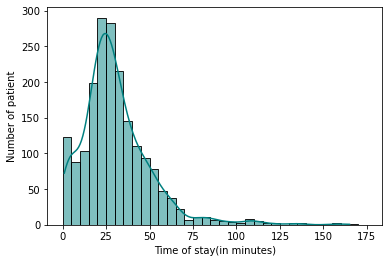

In [37]:
#dfjoin['stay'].hist(bins=range(0, 180,5),color='teal',kde=True)
sns.histplot(dfjoin['stay'],bins=range(0, 180,5),color='teal',kde=True)

plt.xlabel('Time of stay(in minutes)')
plt.ylabel('Number of patient');
dfjoin['stay'].mean()
print("Number of patient exceeding 1 hour: 5%",)

In [38]:
dfjoin[dfjoin['stay'] > 60].count()

TimeIN          123
UniqueID        123
Type            123
Visit           123
Age             123
Address         123
Gender          123
Doctor          123
Reference       123
Attendant       123
TimeOUT         123
OPD_fees        123
Medicine        120
Surgery_fees     26
stay            123
dtype: int64

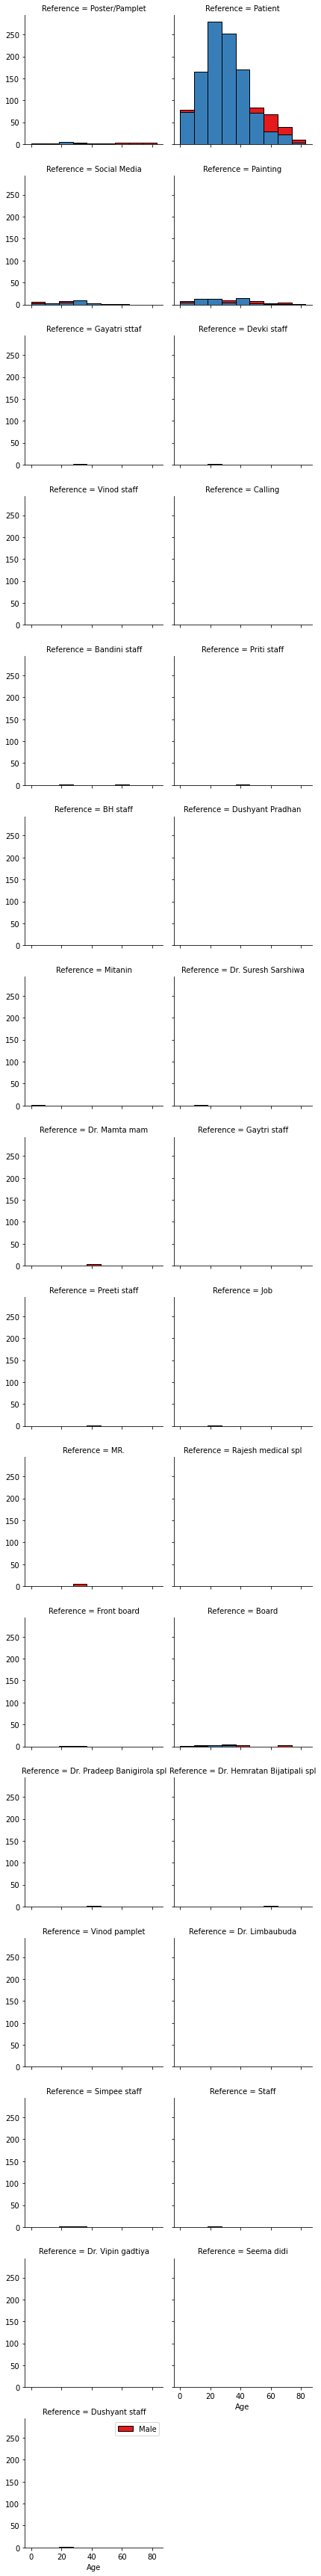

In [39]:
import seaborn as sns

bins = np.linspace(dfjoin['Age'].min(), dfjoin['Age'].max(), 10)

g = sns.FacetGrid(dfjoin, col="Reference", hue="Gender", palette="Set1", col_wrap=2)

g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Conclusion
Maximum patient comes from patient reference.
Only few of them from painting and social media.
And nearly non of them from other sources


In [58]:
dfjoin['Address'].value_counts()

Spl                 577
Basna               266
Saraipali           109
Pithora              67
Sarangarh            67
                   ... 
Taulidih              1
Tilaipali             1
Girsa                 1
Baigindihi basna      1
Jampali               1
Name: Address, Length: 578, dtype: int64

Conclusion:We can focus on village with more population

In [41]:
dfjoin.shape

(2491, 15)

In [42]:
dfjoin.dtypes

TimeIN          datetime64[ns]
UniqueID               float64
Type                    object
Visit                   object
Age                    float64
Address                 object
Gender                  object
Doctor                  object
Reference               object
Attendant               object
TimeOUT         datetime64[ns]
OPD_fees                 int32
Medicine               float64
Surgery_fees           float64
stay                   float64
dtype: object

Now we are interested in weather free OPD was beneficial or not.
And what was the revenue of medicine on that day


In [43]:
dfjoin['dayofweek'] = dfjoin['TimeIN'].dt.weekday
dfjoin['dayofweek2']=dfjoin['TimeIN'].dt.day_name()



Text(0, 0.5, 'OPD_fees')

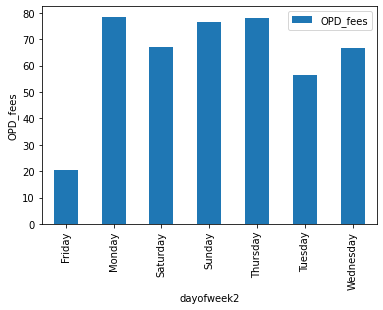

In [140]:

g=dfjoin[['dayofweek2','OPD_fees']].groupby('dayofweek2').mean()
g.plot(kind='bar')
plt.ylabel("OPD_fees")


In [45]:
#sns.barplot(dfjoin['dayofweek'],dfjoin['Medicine'].sum())

dfjoin[['dayofweek2', 'Medicine']].groupby('dayofweek2').sum()

#df[['day', 'salary']].groupby('day').mean().plot(kind='bar', legend=None)




,Medicine
dayofweek2,
Friday,2.363230e+05
Monday,2.614950e+05
Saturday,8.320051e+09
Sunday,2.675090e+05
Thursday,2.036880e+05
Tuesday,1.783120e+05
Wednesday,1.986780e+05


We notice that income on saturday is unexpectadly high
and there must be outlier on the medicine.Hence we will remove that.

In [46]:
dfjoin[dfjoin['Medicine']>10000]


,TimeIN,UniqueID,Type,Visit,Age,Address,Gender,Doctor,Reference,Attendant,TimeOUT,OPD_fees,Medicine,Surgery_fees,stay,dayofweek,dayofweek2
1861,2021-12-11 10:39:00,211112020.0,New,1,29.0,Basna,Female,Dr. Mamta singh,Patient,Jyoti thakur,2021-12-11 10:54:00,0,8.319790e+09,NaN,15.0,5.0,Saturday


In [47]:
dfjoin.drop(dfjoin[dfjoin['Medicine']> 10000].index,axis=0, inplace = True)

In [48]:
dfjoin[dfjoin['Medicine']>10000]

,TimeIN,UniqueID,Type,Visit,Age,Address,Gender,Doctor,Reference,Attendant,TimeOUT,OPD_fees,Medicine,Surgery_fees,stay,dayofweek,dayofweek2


In [49]:
dfjoin[['dayofweek2', 'Medicine']].groupby('dayofweek2').sum()

,Medicine
dayofweek2,
Friday,236323.0
Monday,261495.0
Saturday,261676.0
Sunday,267509.0
Thursday,203688.0
Tuesday,178312.0
Wednesday,198678.0


<AxesSubplot:xlabel='dayofweek2'>

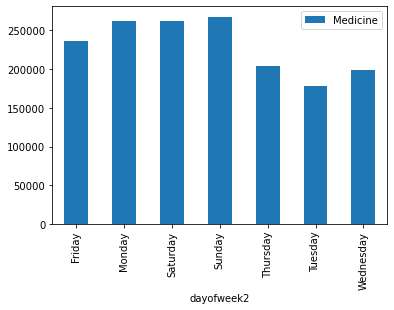

In [59]:
f=dfjoin[['dayofweek2','Medicine']].groupby('dayofweek2').sum()
f.plot(kind='bar')
ylabelk

<AxesSubplot:xlabel='dayofweek2'>

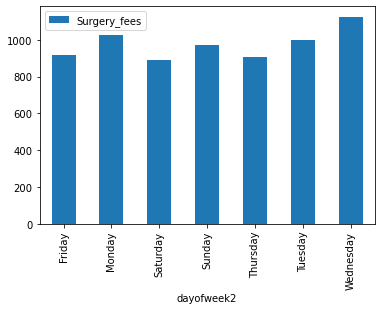

In [51]:
s=dfjoin[['dayofweek2','Surgery_fees']].groupby('dayofweek2').mean()
s.plot(kind='bar')

Conclusion:
Doing free of OPD have not impacted medicine income or surgery fees.



In [115]:
dfjoin['Totalfees']=dfjoin['OPD_fees']+dfjoin['Medicine']+dfjoin['Surgery_fees']

In [116]:
dfjoin.head(10)

,TimeIN,UniqueID,Type,Visit,Age,Address,Gender,Doctor,Reference,Attendant,TimeOUT,OPD_fees,Medicine,Surgery_fees,stay,dayofweek,dayofweek2,Totalfees
0,2021-09-19 23:20:00,210830010.0,New,2,70.0,pithara,Male,Dr. Mamta singh,Poster/Pamplet,Lakshmi,NaT,0.0,0.0,0.0,NaN,6.0,Sunday,0.0
1,2021-09-30 16:15:00,210901001.0,Old,2,49.0,Tosgav,Male,Pharmacy,Patient,Neha,NaT,0.0,0.0,0.0,NaN,3.0,Thursday,0.0
2,2021-09-29 11:29:00,210919016.0,New,1,26.0,Arjunda,Female,Dr. Mamta singh,Social Media,Bandani,NaT,0.0,0.0,0.0,NaN,2.0,Wednesday,0.0
19,2021-09-21 11:08:00,210921008.0,New,1,55.0,Pirda,Female,Dr. Mamta singh,Patient,Jyoti,2021-09-21 11:28:00,100.0,490.0,0.0,20.0,1.0,Tuesday,590.0
20,2021-09-21 11:10:00,210921009.0,Old,5,23.0,Basna,Male,Dr. Mamta singh,Patient,Neha,2021-09-21 11:31:00,100.0,280.0,0.0,21.0,1.0,Tuesday,380.0
21,2021-09-21 11:18:00,210921010.0,Old,5,13.0,Paranpali,Female,Dr. Mamta singh,Patient,Rakhi,2021-09-21 11:44:00,100.0,950.0,0.0,26.0,1.0,Tuesday,1050.0
22,2021-09-21 11:24:00,210921011.0,New,1,24.0,Barihapali,Male,Dr. Mamta singh,Patient,Nilam,2021-09-21 11:42:00,100.0,340.0,0.0,18.0,1.0,Tuesday,440.0
23,2021-09-21 11:25:00,210921012.0,Old,5,68.0,Jagat,Female,Dr. Mamta singh,Patient,Jyoti,2021-09-21 12:17:00,100.0,1790.0,0.0,52.0,1.0,Tuesday,1890.0
24,2021-09-21 11:34:00,210921013.0,New,1,28.0,Golajhar,Male,Dr. Mamta singh,Patient,Neha,2021-09-21 12:00:00,100.0,890.0,0.0,26.0,1.0,Tuesday,990.0
25,2021-09-21 11:41:00,210921014.0,New,1,23.0,Golajhar,Female,Dr. Mamta singh,Patient,Gaytri,2021-09-21 12:01:00,100.0,750.0,0.0,20.0,1.0,Tuesday,850.0


<AxesSubplot:xlabel='dayofweek2'>

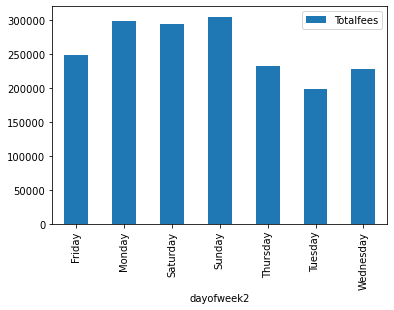

In [117]:
s=dfjoin[['dayofweek2','Totalfees']].groupby('dayofweek2').sum()
s.plot(kind='bar')

<AxesSubplot:xlabel='Attendant'>

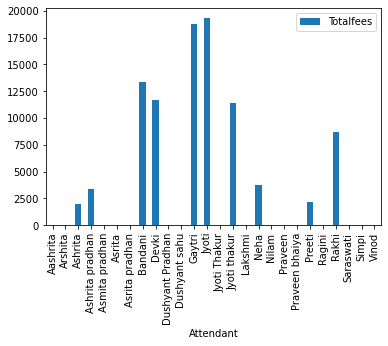

In [68]:
s=dfjoin[['Attendant','Totalfees']].groupby('Attendant').sum()
s.plot(kind='bar')

Gayatri and jyoti contributed most to the clinic

In [65]:
dfjoin.dtypes

TimeIN          datetime64[ns]
UniqueID               float64
Type                    object
Visit                   object
Age                    float64
Address                 object
Gender                  object
Doctor                  object
Reference               object
Attendant               object
TimeOUT         datetime64[ns]
OPD_fees               float64
Medicine               float64
Surgery_fees           float64
stay                   float64
dayofweek              float64
dayofweek2              object
dtype: object

Text(0, 0.5, 'Number of Patient')

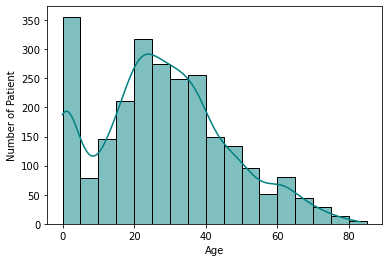

In [154]:
sns.histplot(dfjoin['Age'],bins=range(0,90,5),color='teal',kde=True)
plt.ylabel("Number of Patient")

We see that child (0-5years) come maximum as child needs more healthcare.
Also we see age group 15-35 are also good.
But old age people are very less.The reason is mostly due to long distance from other.So centre in other villages should be opened.

In [119]:
bins=pd.cut(dfjoin['Age'],bins=range(0,100,5))

In [120]:
bins

0       (65.0, 70.0]
1       (45.0, 50.0]
2       (25.0, 30.0]
19      (50.0, 55.0]
20      (20.0, 25.0]
            ...     
3610             NaN
3611             NaN
3612             NaN
3613             NaN
3614             NaN
Name: Age, Length: 2490, dtype: category
Categories (19, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (75, 80] < (80, 85] < (85, 90] < (90, 95]]

Text(0, 0.5, 'Total')

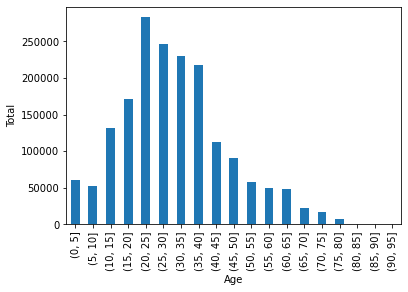

In [139]:
dfjoin['Totalfees'].groupby(by=bins).sum().plot(kind='bar')
plt.ylabel("Total")

We can clearly see we get good revenue with age group 10-45

In [144]:
dfjoin['Totalfees'].groupby([dfjoin['Gender'],bins]).sum()

Gender  Age     
Female  (0, 5]       23588.0
        (5, 10]      32790.0
        (10, 15]     73459.0
        (15, 20]    113419.0
        (20, 25]    162012.0
        (25, 30]    137073.0
        (30, 35]    143950.0
        (35, 40]    134318.0
        (40, 45]     62263.0
        (45, 50]     48001.0
        (50, 55]     19730.0
        (55, 60]     23389.0
        (60, 65]     12550.0
        (65, 70]      8530.0
        (70, 75]      3480.0
        (75, 80]       490.0
        (80, 85]         0.0
        (85, 90]         0.0
        (90, 95]         0.0
Male    (0, 5]       37086.0
        (5, 10]      19020.0
        (10, 15]     58784.0
        (15, 20]     57268.0
        (20, 25]    120993.0
        (25, 30]    109681.0
        (30, 35]     86553.0
        (35, 40]     83788.0
        (40, 45]     50629.0
        (45, 50]     42664.0
        (50, 55]     38750.0
        (55, 60]     26570.0
        (60, 65]     36310.0
        (65, 70]     13970.0
        (70, 75]     13890

Text(0, 0.5, 'Total')

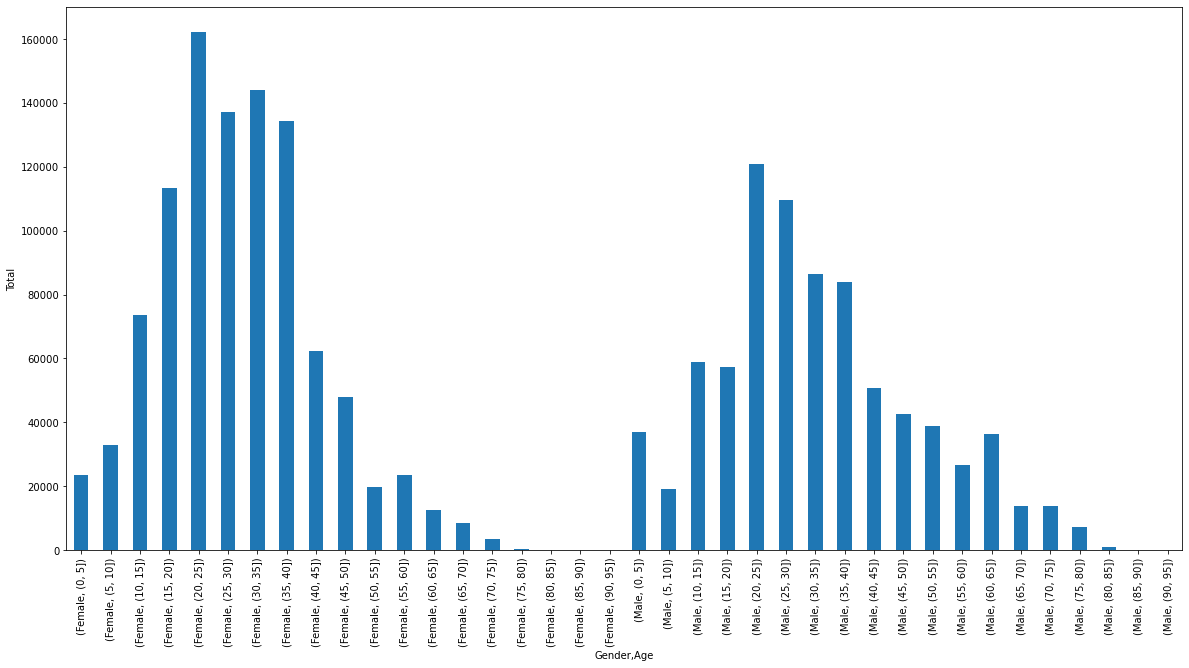

In [152]:

dfjoin['Totalfees'].groupby([dfjoin['Gender'],bins]).sum().plot(kind='bar',stacked=True,figsize=(20,10))
plt.ylabel("Total")

 
We see in both males and females maximum profit comes from age group 10-45 with more revenue from female patients.
Hence we have to focus more on other age group such as Old age people and
Also it may be good idea to appoint more doctor for female.

Thanks for reading.
I would like to recieve comments and suggestion from you.
Email:akdbgbr@gmail.com